<a href="https://colab.research.google.com/github/shubham3032002/Maternal-Health-Risk-detection/blob/main/Maternal_Health_Risk_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import shutil
# Download latest version
save_path='/content/'
path = kagglehub.dataset_download("csafrit2/maternal-health-risk-data")
shutil.move(path,save_path)
print("Path to dataset files:", save_path)

100%|██████████| 3.77k/3.77k [00:00<00:00, 7.40MB/s]

Extracting files...
Path to dataset files: /content/


In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/dataset/Maternal Health Risk Data Set.csv")

# Display the first 5 rows
print(df.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


In [4]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:

print(df.isnull().sum())

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [6]:
print(df["RiskLevel"].value_counts())

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64


In [7]:
print(df.describe())

               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  


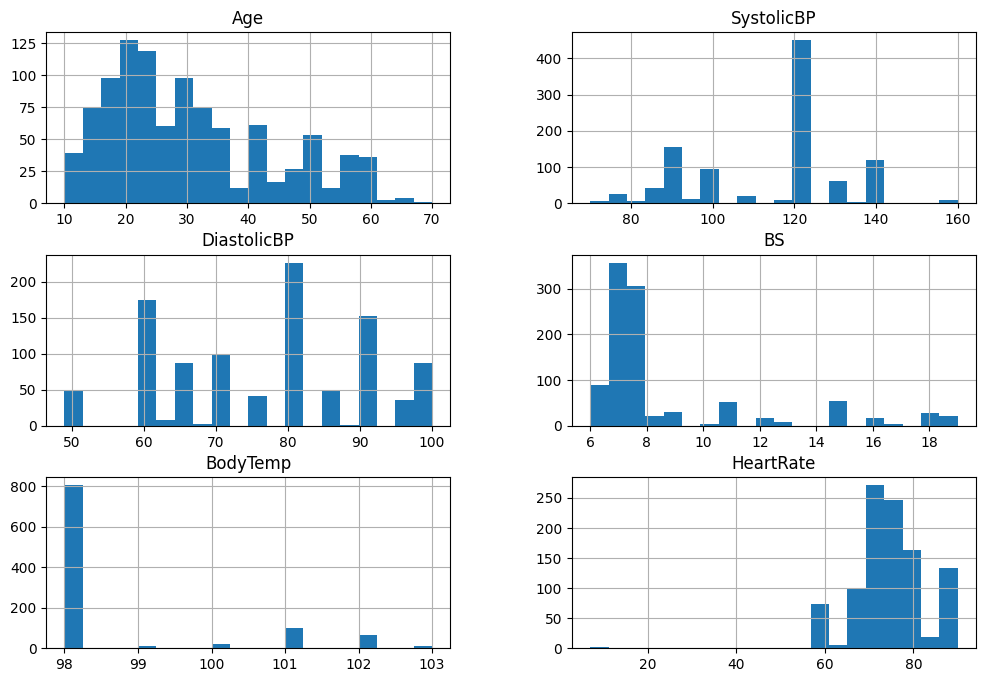

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(12, 8), bins=20)
plt.show()

In [10]:
print(df.dtypes)

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object


In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["RiskLevel"] = encoder.fit_transform(df["RiskLevel"])

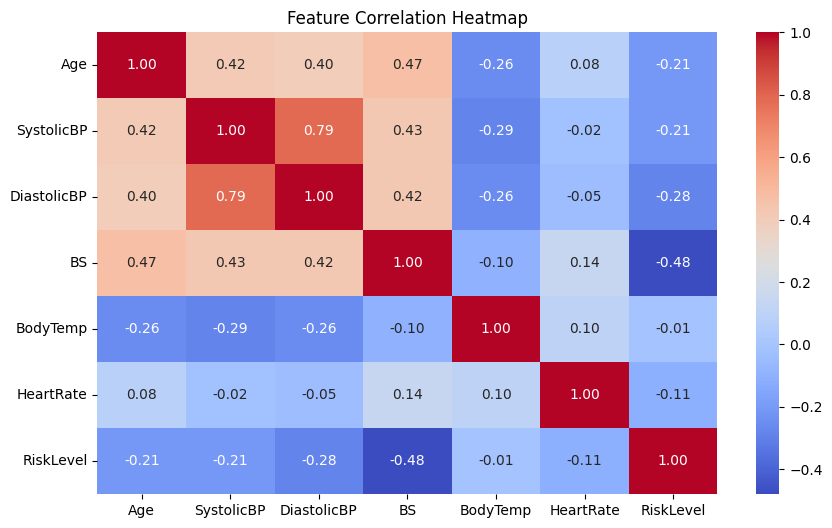

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

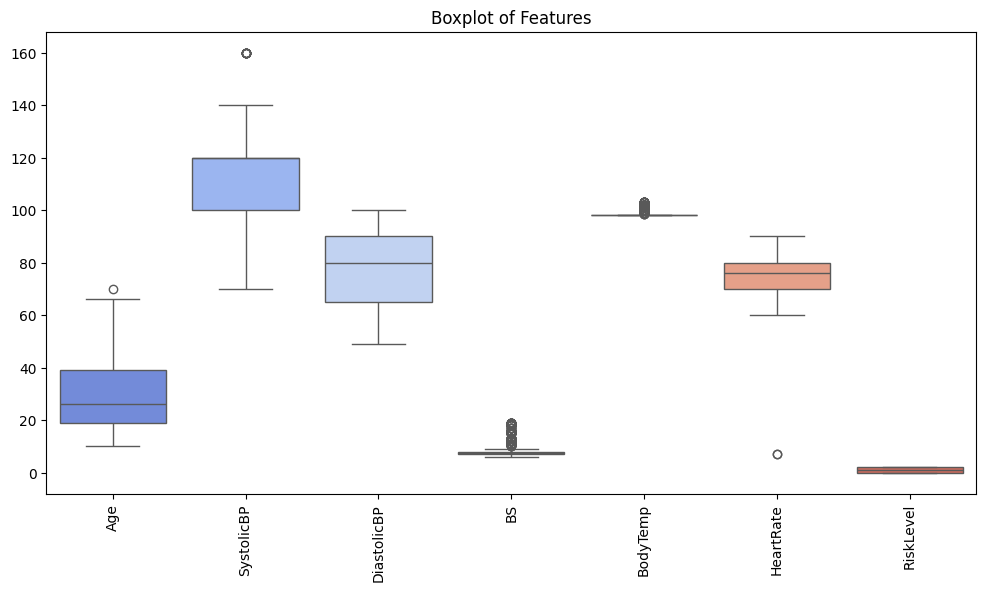

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.show()


In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


encoder = LabelEncoder()
df["RiskLevel"] = encoder.fit_transform(df["RiskLevel"])  # Low (0), Medium (1), High (2)

X = df.drop("RiskLevel", axis=1)
y = df["RiskLevel"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8620689655172413
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        55
           1       0.89      0.80      0.84        81
           2       0.76      0.87      0.81        67

    accuracy                           0.86       203
   macro avg       0.87      0.87      0.87       203
weighted avg       0.87      0.86      0.86       203



In [16]:
import pickle


with open("pregnancy_risk_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully!")


Model saved successfully!


In [26]:
import numpy as np
import pickle

def predict_pregnancy_risk(model_path, input_features):
    # Load model
    with open(model_path, "rb") as file:
        model = pickle.load(file)

    # Ensure input has the correct number of features
    if len(input_features) != model.n_features_in_:
        raise ValueError(f"Expected {model.n_features_in_} features, but got {len(input_features)}.")

    # Convert input to numpy array
    input_data = np.array([input_features])

    # Predict risk level
    prediction = model.predict(input_data)[0]
    risk_label = ["Low", "Medium", "High"][prediction]

    return risk_label


In [27]:
model_path = "/content/pregnancy_risk_model.pkl"
input_features = [25, 130, 80, 15.0, 98.0, 1]
risk_level = predict_pregnancy_risk(model_path, input_features)
print(f"Predicted Risk Level: {risk_level}")

Predicted Risk Level: Low


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
